# Solutions: Corollary 0.0.4 in $\mathbb R^2$

*These are **solutions** to the worksheet on corollary 0.0.4. Please **DO NOT LOOK AT IT** if you haven't given the worksheet a fair amount of thought.*

In this worksheet we will run through the proof of Corollary 0.0.4 from Vershynin. We will "pythonize" the proof step-by-step in the case of a polytope in $\mathbb R^2$ and visualize it. Please fill in the code wherever indicated. Here is the corollary (slightly generalized) for reference:

**Corollary 0.0.4 (Generalized)**: Let $P$ be a polytope in $\mathbb R^n$ with $N$ vertices. Then $P$ can be covered by at most $N^{\lceil (\text{diam}(T)/\epsilon)^2 \rceil}$ Euclidean balls of radii $\epsilon > 0$.

In [1]:
# Some useful imports:
import numpy as np
import matplotlib.pyplot as plt
import itertools as it
import math

## The Proof of Corollary 0.0.4 in $\mathbb R^2$

Fix $\epsilon > 0$ and a polytope $P$ in $\mathbb R^n$ (in our case $n = 2$). Denote by $T$ the set of vertices of $P$.

In [4]:
# Set epsilon to your favorite positive number
epsilon = 1.0

# Represent a polytope P in R2 by listing its points clockwise
# Represent the points as numpy arrays of length 2
P =  [np.array([0,0]), 
      np.array([0,1]),  
      np.array([1,1]), 
      np.array([1.5,.5]), 
      np.array([1,0])]

# Set N to the number of vertices of P (don't hard-code it in if you want to be able to change P easily later)
N = len(P)

Let us define the centers of the balls as follows. \
Let $k := \lceil (\text{diam}(T)/\epsilon)^2 \rceil$. Recall that the $\text{diam}(T) = \sup_{x, y \in T} \lvert x - y \rvert$.

In [5]:
# Compute diam(T)
diamT = 0
for i in range(N):
    for j in range(i+1, N):
        d_xixj = np.sqrt(np.sum((P[i] - P[j])**2))
        diamT = d_xixj if (d_xixj > diamT) else diamT

# Compute k
k = math.ceil((diamT/epsilon)**2)

Consider the set
\begin{equation}
\mathcal N := \left\{ \frac{1}{k} \sum_{j=1}^k x_j : x_j \text{ are vertices of } P \right\}
\end{equation}

In [6]:
# Construct \mathcal N

calN = []

# This gives an iterator over all combinations
# of k elements of P with replacement.
combinations = it.combinations_with_replacement(P, k)

# Compute the vector average and append it to calN
for comb in combinations:
    vec_sum = np.array([0,0])
    for vec in comb:
        vec_sum = vec_sum + vec
    calN.append(vec_sum / k)

We claim that the family of $\epsilon$-balls centered at $\mathcal N$ satisfy the conclusion of the corollary. To check this, note that the polytope $P$ is the convex hull of the set of its vertices. Thus we apply Theorem 0.0.2 to any point $x \in P = \text{conv}(T)$ and deduce that $x$ is within distance $\text{diam(T)} / \sqrt k \leq \epsilon$ from some point in $\mathcal N$. This shows that the $\epsilon$-balls centered at $\mathcal N$ indeed cover $P$.

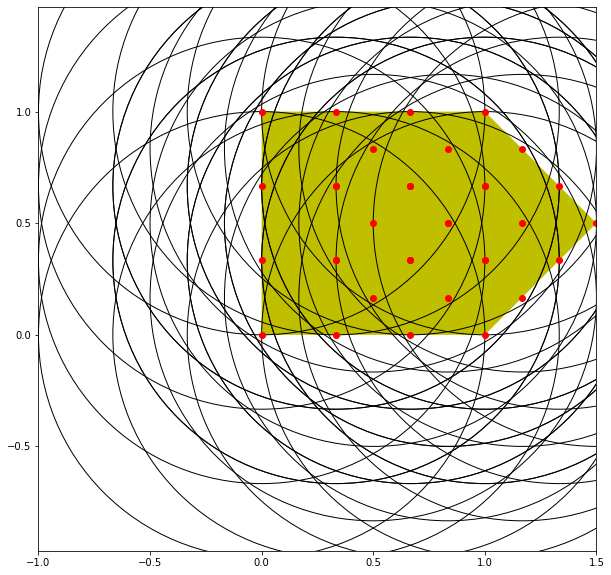

In [8]:
# We visualize the covering here
# Feel free to play around with the visualization!
scale = 10
figure, axes = plt.subplots(figsize=(scale, scale))
axes.axis('equal')
axes.set_xlim([-1, 1.5])
axes.set_ylim([-1,1.5])
plt.fill([p[0] for p in P], [p[1] for p in P], 'y', fill = True)
plt.plot([p[0] for p in calN], [p[1] for p in calN], 'or')
for p in calN:
    axes.add_artist(plt.Circle((p[0], p[1]), epsilon, fill = False))

We can bound the cardinality of $\mathcal N$ by noting that there are $N^k$ ways to choose $k$ out of $N$ vertices with repetition. Thus $|\mathcal N| \leq N^k = N^{\lceil (\text{diam}(T)/\epsilon)^2 \rceil}$. In fact we can be more clever by noticing that the order in which we choose the elements does not matter (this is addressed in exercise 0.0.6).

## Further Questions
At least in $\mathbb R^2$, Corollary 0.0.4 is rather wasteful. How can we come up with a more efficient covering of a polytope?
Is there a way to cleverly construct a subset of $\mathcal N$ that gets the job done?

Copyright (c) 2020 TRIPODS/GradStemForAll 2020 Team